# Matplotlib Basics

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0, 0.5, 'Y axis')

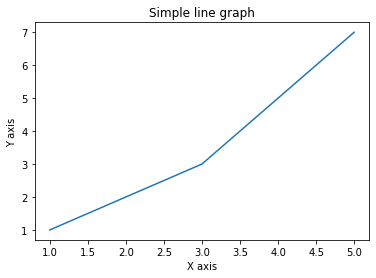

In [6]:
# simple line graph
plt.plot([1,2,3,5],[1,2,3,7])
plt.title('Simple line graph')
plt.xlabel('X axis')
plt.ylabel('Y axis')

###  1. Ploting equations

In [43]:
def plotter(x,y,title):
    plt.plot(x,y)
    plt.title(title, fontsize=15)
    plt.xlabel("Values of X")
    plt.ylabel("Values of Y")
    plt.show()

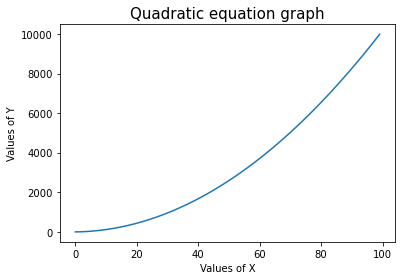

In [44]:
x = np.arange(0,100)
y = x*x + 2*x -12
plotter(x,y,'Quadratic equation graph')

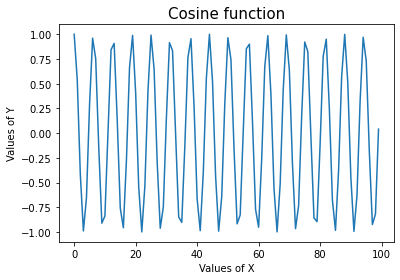

In [27]:
# Cos function
y = np.cos(x)
plotter(x,y,"Cosine function")
#plotter(x,np.sin(x),"Sine function",1)

### 2. Ploting Histograms

In [118]:
# Read csv
acsv= pd.read_csv('./datasets/auto-mpg.csv')
display(acsv.head())
display(type(acsv.columns))
display(acsv.columns)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


pandas.core.indexes.base.Index

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

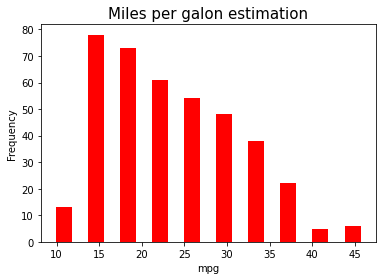

In [52]:
# MPG histogram
plt.figure()
plt.hist(acsv['mpg'], color = 'red', rwidth = 0.5)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")
plt.xticks()
plt.yticks()
plt.show()

Text(0, 0.5, 'Frequency')

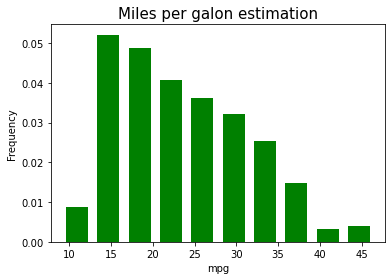

In [68]:
# desity in histogram
plt.figure()
plt.hist(acsv['mpg'],color = 'green', rwidth =0.7, density = True)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

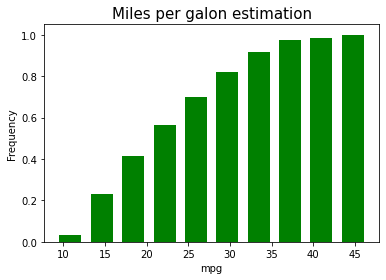

In [70]:
# Cumilative
# desity in histogram
plt.figure()
plt.hist(acsv['mpg'],color = 'green', rwidth =0.7, density = True, cumulative=True)
plt.title('Miles per galon estimation', fontsize = 15)
plt.xlabel("mpg")
plt.ylabel("Frequency")

#### Converting datatypes inside datasets

In [119]:
acsv.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [120]:
acsv['horsepower'].astype(float)

ValueError: could not convert string to float: '?'

In [123]:
acsv[acsv['horsepower']=='?'].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [124]:
# removing '?' rows
acsv.drop([32, 126, 330, 336, 354, 374], inplace = True)
acsv[acsv['horsepower']=='?'].index

Int64Index([], dtype='int64')

In [125]:
# converting to float
acsv['horsepower']=acsv['horsepower'].astype('float')
acsv.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [117]:
acsv['horsepower']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
393   NaN
394   NaN
395   NaN
396   NaN
397   NaN
Name: horsepower, Length: 398, dtype: float64

#### Combining 2 histograms

(array([ 27.,  95., 120.,  44.,  19.,  47.,  13.,  14.,   5.,   8.]),
 array([ 46. ,  64.4,  82.8, 101.2, 119.6, 138. , 156.4, 174.8, 193.2,
        211.6, 230. ]),
 <BarContainer object of 10 artists>)

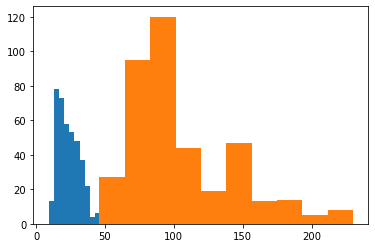

In [128]:
plt.hist(acsv['mpg'])
plt.hist(acsv['horsepower'])

<AxesSubplot:ylabel='Frequency'>

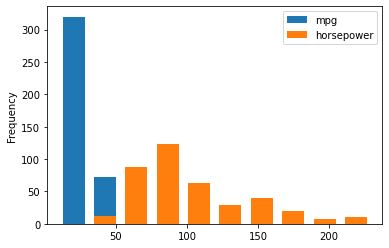

In [131]:
# More meaningful graph Combined graph
acsv[['mpg','horsepower']].plot.hist(rwidth=.7)

<AxesSubplot:ylabel='Density'>

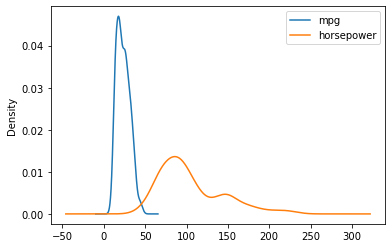

In [135]:
# More meaningful graph Combined graph
acsv[['mpg','horsepower']].plot.kde() # kernel based density estimation
# probability density of continuos variables